In [1]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt

In [9]:
# Step 1: Load and Prepare the Data
def load_graph_from_excel(file_path):
    df = pd.read_csv(file_path)
    G = nx.Graph()
    G.add_edges_from(zip(df['# source'], df[' target']))
    return G

In [3]:
# Step 2: Identify the Giant Component
def find_giant_component(G):
    components = list(nx.connected_components(G))
    giant_component = max(components, key=len)
    return G.subgraph(giant_component).copy()

In [4]:
# Step 3: Simulate Failures and Analyze
def simulate_failures(G, mode="random", fraction=0.1):
    nodes = list(G.nodes())
    if mode == "random":
        removed_nodes = random.sample(nodes, int(fraction * len(nodes)))
    elif mode == "targeted":
        removed_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:int(fraction * len(nodes))]
        removed_nodes = [node for node, _ in removed_nodes]
    else:
        raise ValueError("Mode must be 'random' or 'targeted'")

    G.remove_nodes_from(removed_nodes)
    return find_giant_component(G)

In [7]:
# Visualization of Simulation
def plot_simulation_results(G, fractions, mode):
    sizes = []
    for fraction in fractions:
        G_copy = G.copy()
        G_gc = simulate_failures(G_copy, mode=mode, fraction=fraction)
        sizes.append(len(G_gc))

    plt.plot(fractions, sizes, label=f"{mode.capitalize()} Failures")
    plt.xlabel("Fraction of Nodes Removed")
    plt.ylabel("Size of Giant Component")
    plt.title("Effect of Failures on Giant Component")
    plt.legend()
    plt.grid()
    plt.show()

Size of Giant Component: 2217


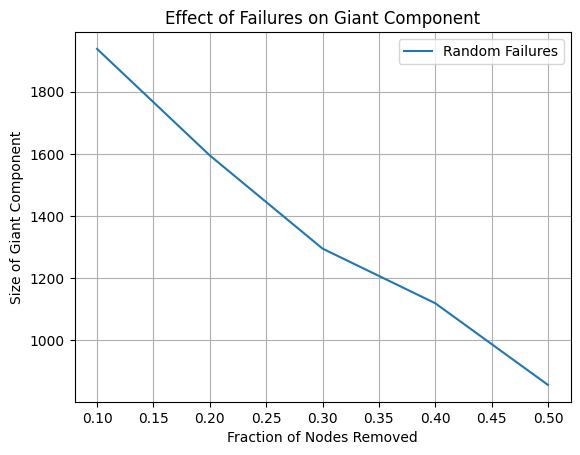

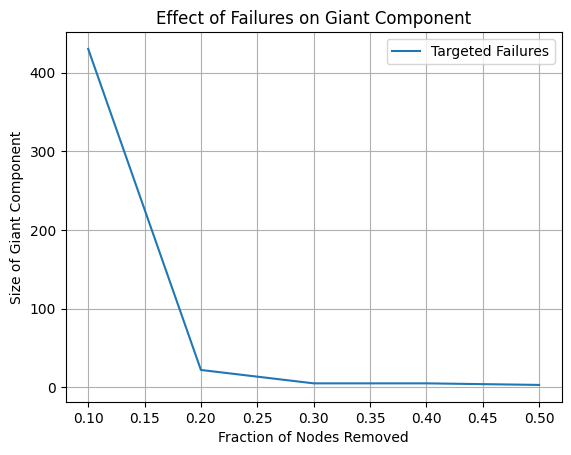

In [10]:
# Example Usage (File path to be adjusted):
file_path = "data/edges.csv"
G = load_graph_from_excel(file_path)
G_gc = find_giant_component(G)

print("Size of Giant Component:", len(G_gc))

fractions = [0.1, 0.2, 0.3, 0.4, 0.5]
plot_simulation_results(G, fractions, mode="random")
plot_simulation_results(G, fractions, mode="targeted")
